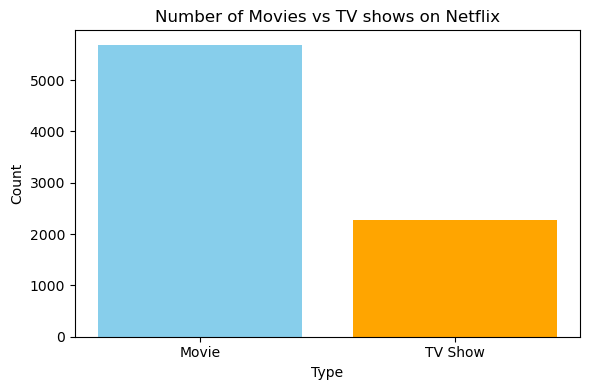

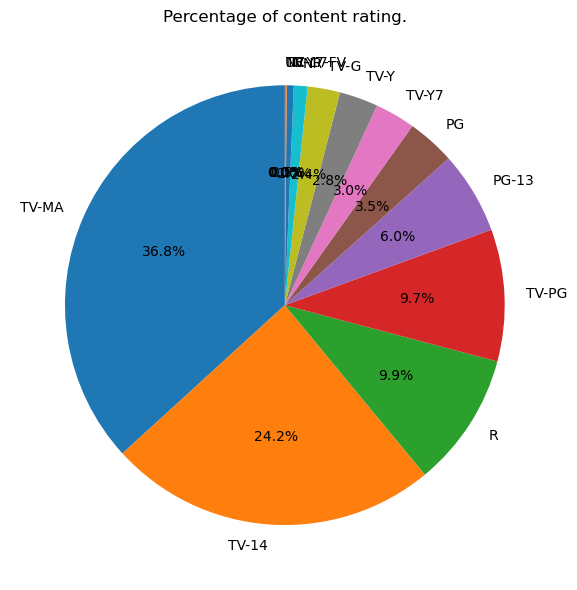

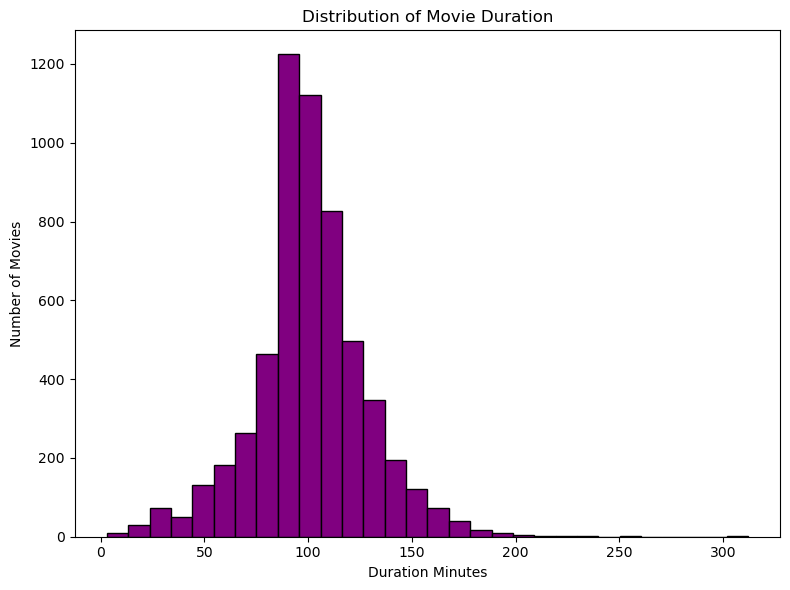

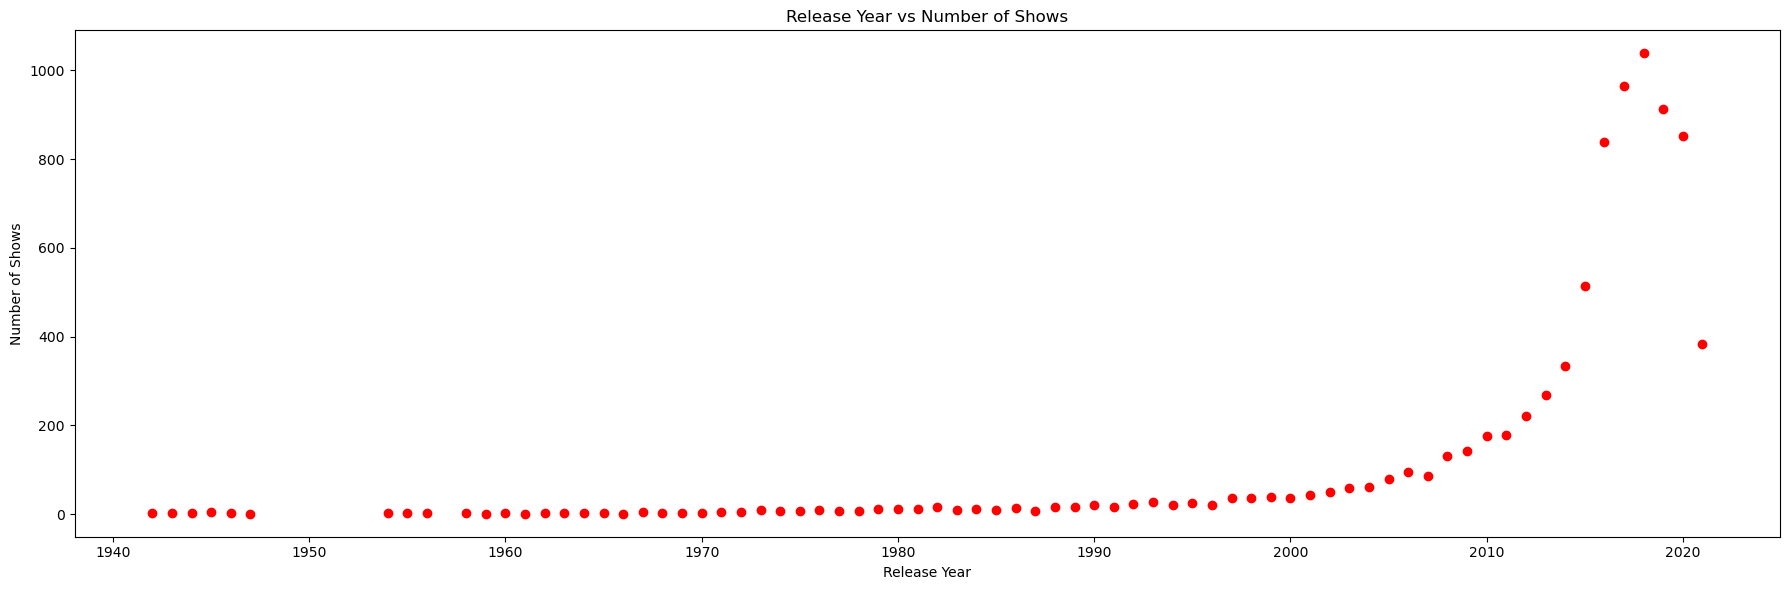

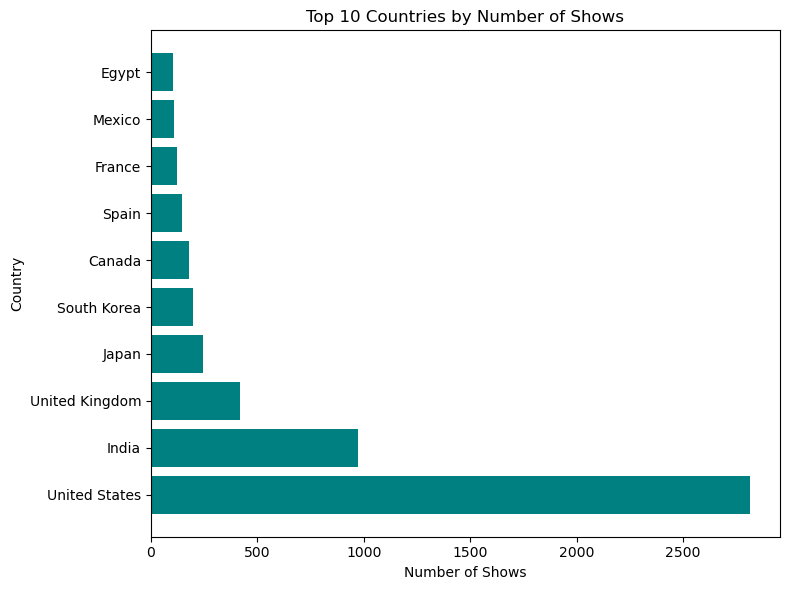

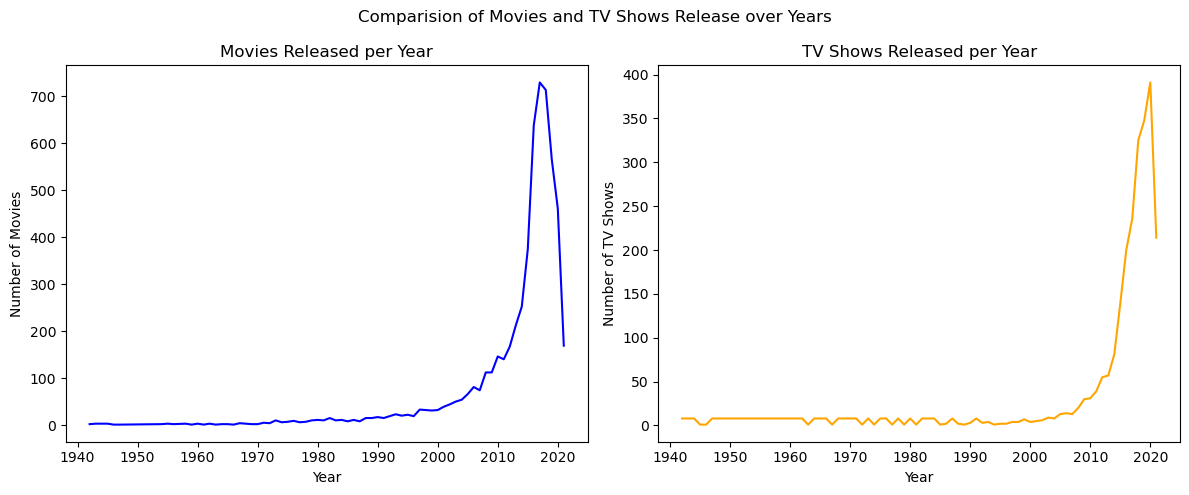

In [21]:
#s-1 import the libraries
import pandas as pd
import matplotlib.pyplot as plt

#load the data
df = pd.read_csv("netflix_titles.csv")

#clean data
df = df.dropna(subset=['type', 'release_year', 'rating', 'country', 'duration'])

type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'orange'])
plt.title("Number of Movies vs TV shows on Netflix")
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('Movies_vs_tvshows.png')
plt.show()

rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%' ,startangle=90)
plt.title("Percentage of content rating.")
plt.tight_layout()
plt.savefig('content_ratings.png')
plt.show()

movie_df = df[df['type'] =='Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min', '').astype(int)
plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration Minutes')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('Movie_duration_histogram.png')
plt.show()

release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(18,6))
plt.scatter(release_counts.index, release_counts.values, color='red')
plt.title('Release Year vs Number of Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('release_year_scatter.png', dpi=300)
plt.show()

country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index, country_counts.values, color='teal')
plt.title('Top 10 Countries by Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top10_countries.png')
plt.show()


content_by_year = df.groupby(['release_year',  'type']).size().unstack().fillna(8)

fig, ax = plt.subplots(1,2,figsize=(12,5))

#first subplot: movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title('Movies Released per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

#second subplot: tv shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[1].set_title('TV Shows Released per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Shows')

fig.suptitle('Comparision of Movies and TV Shows Release over Years')

plt.tight_layout()
plt.savefig('movies_tv_shows_comparision.png')
plt.show()

